## Final Notebook Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
housing_df['datetime'] = pd.to_datetime(housing_df['date'])
housing_df['soldyear'] = housing_df['datetime'].dt.year
housing_df['age_when_sold'] = housing_df['soldyear'] - housing_df['yr_built']

In [5]:
housing_df['grade_num'] = housing_df['grade'].str.split()
housing_df['grade_num'] = housing_df['grade_num'].str[0]
housing_df['grade_num'] = housing_df['grade_num'].astype(int)

In [6]:
housing_df['sqft_basement'] = housing_df['sqft_living'] - housing_df['sqft_above']
housing_df['Basement'] = None
housing_df['Basement'] = housing_df['sqft_basement'].map(lambda x: False if x == 0 else True)
housing_df['Basement'] = housing_df['Basement'].astype(int)

In [7]:
housing_df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [8]:
replace_dict2 = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
housing_df['condition'] = housing_df['condition'].replace(replace_dict2)

In [9]:
from sklearn.impute import SimpleImputer
wtr_col = housing_df[['waterfront']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer.fit(wtr_col)
waterfront_imputed = imputer.transform(wtr_col)
housing_df.waterfront = waterfront_imputed

In [10]:
from sklearn.preprocessing import OrdinalEncoder
wtr_col = housing_df[['waterfront']]
encoder_wtr = OrdinalEncoder()
encoder_wtr.fit(wtr_col)
encoded_wtr = encoder_wtr.transform(wtr_col)
encoded_wtr = encoded_wtr.flatten()
housing_df.waterfront = encoded_wtr

In [11]:
from sklearn.impute import SimpleImputer
view_col = housing_df[['view']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NONE')
imputer.fit(view_col)
view_imputed = imputer.transform(view_col)
housing_df.view = view_imputed

In [12]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
datetime            0
soldyear            0
age_when_sold       0
grade_num           0
Basement            0
dtype: int64

In [13]:
housing_ols = housing_df.drop(['datetime', 'date', 'soldyear', 'yr_built', 'lat', 'long',
 'sqft_above', 'sqft_lot15', 'sqft_living15', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated'], axis = 1)

In [14]:
housing_ols

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,age_when_sold,grade_num,Basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,NONE,3,98178,59,7,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,NONE,3,98125,63,7,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,NONE,3,98028,82,6,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,NONE,5,98136,49,7,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,NONE,3,98074,28,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,NONE,3,98103,5,8,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,NONE,3,98146,1,8,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,NONE,3,98144,5,7,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,NONE,3,98027,11,8,0


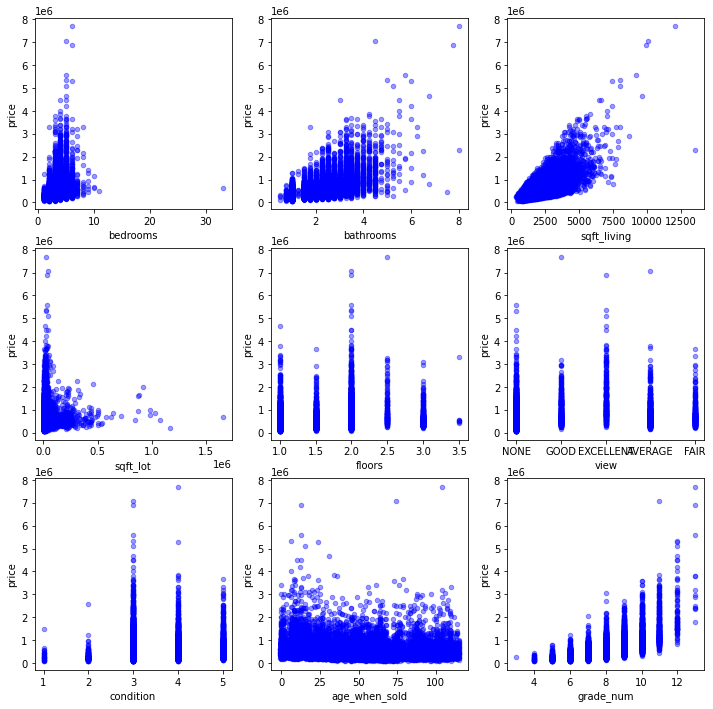

In [15]:
fig, (axes1, axes2, axes3) = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living'], axes1):
    housing_ols.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
for xcols, axs in zip(['sqft_lot', 'floors', 'view'], axes2):
    housing_ols.plot(kind='scatter', x=xcols, y='price', ax=axs, alpha=0.4, color='b')
for xcolss, axss in zip(['condition', 'age_when_sold', 'grade_num'], axes3):
    housing_ols.plot(kind='scatter', x=xcolss, y='price', ax=axss, alpha=0.4, color='b')

In [16]:
housing_pred = housing_ols.copy()
bedrooms_ohe = housing_pred[['bedrooms']]
ohe_bedrooms = OneHotEncoder(categories ='auto', sparse =False)
ohe_bedrooms.fit(bedrooms_ohe)
ohe_bedrooms_encoded = ohe_bedrooms.transform(bedrooms_ohe)
bedrooms_encoded_ohe = pd.DataFrame(ohe_bedrooms_encoded, columns = ohe_bedrooms.get_feature_names(['bedrooms']), index = housing_pred.index )
housing_pred1 = pd.concat([housing_pred, bedrooms_encoded_ohe ], axis =1)

In [17]:
grade_num_ohe = housing_pred[['grade_num']]
ohe_grade_num = OneHotEncoder(categories ='auto', sparse =False)
ohe_grade_num.fit(grade_num_ohe)
ohe_grade_num_encoded = ohe_grade_num.transform(grade_num_ohe)
grade_num_encoded_ohe = pd.DataFrame(ohe_grade_num_encoded, columns = ohe_grade_num.get_feature_names(['grade_num']), index = housing_pred.index )
housing_pred2 = pd.concat([housing_pred1, grade_num_encoded_ohe], axis =1)

In [18]:
condition_ohe = housing_pred[['condition']]
ohe = OneHotEncoder(categories="auto", sparse=False)
cond_encoded_ohe = pd.DataFrame (ohe.fit_transform(condition_ohe))
cond_encoded_ohe.columns = ohe.get_feature_names(['condition'])
housing_pred3 = pd.concat([housing_pred2, cond_encoded_ohe], axis = 1)

In [19]:
bathrooms_ohe = housing_pred[['bathrooms']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
bathrooms_transform = ohe.fit_transform(bathrooms_ohe)
bathrooms_encoded_ohe = pd.DataFrame(bathrooms_transform, columns=ohe.get_feature_names(['bathrooms']), index=housing_pred.index)
housing_pred4 = pd.concat([housing_pred3, bathrooms_encoded_ohe], axis = 1)

In [20]:
view_ohe = housing_pred[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False)
ohe.fit(view_ohe)
view_encoded = ohe.transform(view_ohe)
view_encoded_ohe =pd.DataFrame(view_encoded, columns=ohe.get_feature_names(['view']), index=housing_pred.index)
housing_pred5 = pd.concat([housing_pred4, view_encoded_ohe], axis = 1)

In [21]:
floors_ohe = housing_pred[['floors']]
ohe_floors = OneHotEncoder(categories ='auto', sparse =False)
ohe_floors.fit(floors_ohe)
ohe_floors_encoded = ohe_floors.transform(floors_ohe)
floors_encoded_ohe = pd.DataFrame(ohe_floors_encoded, columns = ohe_floors.get_feature_names(['floors']), index = housing_pred.index )
housing_pred6 = pd.concat([housing_pred5, floors_encoded_ohe ], axis =1)

In [22]:
zipcode_ohe = housing_pred[['zipcode']]
ohe = OneHotEncoder(categories="auto", sparse=False)
ohe.fit(zipcode_ohe)
zipcode_encoded = ohe.transform(zipcode_ohe)
zipcode_encoded_ohe =pd.DataFrame(zipcode_encoded, columns=ohe.get_feature_names(['zipcode']), index=housing_pred.index)
housing_pred_final = pd.concat([housing_pred6, zipcode_encoded_ohe ], axis =1)

In [23]:
housing_pred_final.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=152)

In [24]:
housing_pred_final.drop(['id', 'floors', 'bedrooms', 'bathrooms', 'view', 'condition', 'zipcode', 'grade_num'], axis = 1, inplace=True)

In [25]:
X_dummy = housing_pred_final['price']
y_dummy = housing_pred_final.drop('price', axis = 1)

In [26]:
from sklearn.model_selection import train_test_split
d_X_train, d_X_test, d_y_train, d_y_test = train_test_split(X_dummy, y_dummy, test_size=0.2, random_state=42)

In [27]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(d_X_train, d_y_train)

DummyRegressor()

In [28]:
print(dummy_regr.score(d_X_train, d_y_train))
print(dummy_regr.score(d_X_test, d_y_test))

0.013986013986011344
-0.00028236347826728


In [29]:
simple_model_df = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living']], axis = 1)
X_simple = simple_model_df.drop('price', axis = 1)
y_simple = simple_model_df['price']

In [30]:
from sklearn.model_selection import train_test_split
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

In [31]:
simple_reg = LinearRegression()
simple_reg.fit(s_X_train, s_y_train)
print(simple_reg.score(s_X_train, s_y_train))
print(simple_reg.score(s_X_test, s_y_test))

0.49249290659878187
0.49332469237979504


In [32]:
s_y_hat_train = simple_reg.predict(s_X_train)
s_y_hat_test = simple_reg.predict(s_X_test)
s_train_mse = mean_squared_error(s_y_train, s_y_hat_train)
s_test_mse = mean_squared_error(s_y_test, s_y_hat_test)
print('Train Mean Squarred Error:', s_train_mse)
print('Test Mean Squarred Error:', s_test_mse)

Train Mean Squarred Error: 69086961740.93782
Test Mean Squarred Error: 65977373783.61759


In [33]:
multi_model_1 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], view_encoded_ohe], axis = 1)
X_multi1 = multi_model_1.drop('price', axis = 1)
y_multi1 = multi_model_1['price']

In [34]:
from sklearn.model_selection import train_test_split
m_one_X_train, m_one_X_test, m_one_y_train, m_one_y_test = train_test_split(X_multi1, y_multi1, test_size=0.2, random_state=42)

In [35]:
multi1_reg = LinearRegression()
multi1_reg.fit(m_one_X_train, m_one_y_train)
print(multi1_reg.score(m_one_X_train, m_one_y_train))
print(multi1_reg.score(m_one_X_test, m_one_y_test))

0.5424908222182263
0.5435522225645003


In [36]:
m_one_y_hat_train = multi1_reg.predict(m_one_X_train)
m_one_y_hat_test = multi1_reg.predict(m_one_X_test)
m_one_train_mse = mean_squared_error(m_one_y_train, m_one_y_hat_train)
m_one_test_mse = mean_squared_error(m_one_y_test, m_one_y_hat_test)
print('Train Mean Squarred Error:', m_one_train_mse)
print('Test Mean Squarred Error:', m_one_test_mse)

Train Mean Squarred Error: 62280743407.3619
Test Mean Squarred Error: 59436931643.68157


In [37]:
multi_model_2 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], view_encoded_ohe, cond_encoded_ohe], axis = 1)
X_multi2 = multi_model_2.drop('price', axis = 1)
y_multi2 = multi_model_2['price']

In [38]:
from sklearn.model_selection import train_test_split
m_two_X_train, m_two_X_test, m_two_y_train, m_two_y_test = train_test_split(X_multi2, y_multi2, test_size=0.2, random_state=42)

In [39]:
multi2_reg = LinearRegression()
multi2_reg.fit(m_two_X_train, m_two_y_train)
print(multi2_reg.score(m_two_X_train, m_two_y_train))
print(multi2_reg.score(m_two_X_test, m_two_y_test))

0.5478229394408431
0.5451114161992303


In [40]:
m_two_y_hat_train = multi2_reg.predict(m_two_X_train)
m_two_y_hat_test = multi2_reg.predict(m_two_X_test)
m_two_train_mse = mean_squared_error(m_two_y_train, m_two_y_hat_train)
m_two_test_mse = mean_squared_error(m_two_y_test, m_two_y_hat_test)
print('Train Mean Squarred Error:', m_two_train_mse)
print('Test Mean Squarred Error:', m_two_test_mse)

Train Mean Squarred Error: 61554882067.989655
Test Mean Squarred Error: 59233899248.59054


In [41]:
multi_model_2

,price,sqft_living,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_1,condition_2,condition_3,condition_4,condition_5
0,221900.0,1180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,538000.0,2570,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,180000.0,770,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,604000.0,1960,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,510000.0,1680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
21593,400000.0,2310,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
21594,402101.0,1020,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
21595,400000.0,1600,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [42]:
#baseline
#dummy_regr.score(X_train, y_train)
#dummy_regr.score(X_test, y_test)
#first simple model
#simple_reg.score(X_train, y_train)
#simple_reg.score(X_test, y_test)
#second multi model
#multi1_reg.score(X_train, y_train)
#multi1_reg.score(X_test, y_test)
#third multi model
#multi2_reg.score(X_train, y_train)
#multi2_reg.score(X_test, y_test)

column = ['baseline', '1st model', '2nd model', '3rd model']
index = ['train', 'test']
regression_score = pd.DataFrame(index=index, columns=column)

In [44]:
regression_score['baseline'] = [dummy_regr.score(d_X_train, d_y_train), dummy_regr.score(d_X_test, d_y_test)]
regression_score['1st model'] = [simple_reg.score(s_X_train, s_y_train),simple_reg.score(s_X_test, s_y_test)]
regression_score['2nd model'] = [multi1_reg.score(m_one_X_train, m_one_y_train),multi1_reg.score(m_one_X_test, m_one_y_test)]
regression_score['3rd model'] = [multi2_reg.score(m_two_X_train, m_two_y_train),multi2_reg.score(m_two_X_test, m_two_y_test)]

In [50]:
regression_score = regression_score.T

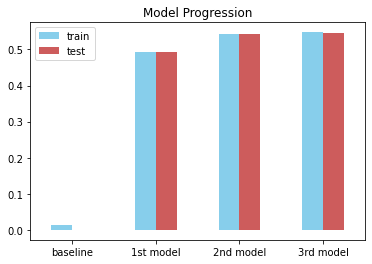

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = regression_score.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Model Progression")